Using the Mental Health dataset and what you have learn this week, answer the following questions :

1. What is the distribution of mental health conditions among different age groups in the tech industry?
- Answer: The distribution of mental health conditions among different age groups in the tech industry indicates an increase in the prevalence of mental health issues with age. 
2. How does the frequency of mental health issues vary by gender?
- Answer: 
3. Identify the countries with the highest and lowest reported rates of mental health issues in the tech industry.
- Answer: 

In [1]:
# importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
from kaggle.api.kaggle_api_extended import KaggleApi

In [2]:
# Initialize Kaggle API
api = KaggleApi()
api.authenticate()  # Make sure you have properly set up your Kaggle API credentials

# Download the dataset
api.dataset_download_files("osmi/mental-health-in-tech-survey", path=".", unzip=True)

# List the files in the current directory
files = os.listdir()

# access the dataset files without saving them to a specific folder
for file in files:
    if file.endswith('.csv'):
        print(f"Found CSV file: {file}")

Found CSV file: survey.csv


In [3]:
df_mental_health = pd.read_csv('survey.csv')

In [4]:
# Introduction to the Dataset:
df = df_mental_health.copy()
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [6]:
# the data contains 27 columns (26 object, 1 int), 1259 rows

In [7]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [8]:
# we have missings in columns: 'comments' (i'll drop this column), 'work_interfere' (264 missings), 'self_employed' (18), 'state' (515 missings) 

In [9]:
df = df.drop(columns='comments')

In [10]:
df = df.fillna('')

In [11]:
df.isna().sum()

Timestamp                    0
Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [12]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,Female,United States,IL,,No,Yes,Often,6-25,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,M,United States,IN,,No,No,Rarely,More than 1000,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,Male,Canada,,,No,No,Rarely,6-25,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,,,Yes,Yes,Often,26-100,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,Male,United States,TX,,No,No,Never,100-500,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


1. What is the distribution of mental health conditions among different age groups in the tech industry?
to answer this question, firstly i need check column 'age'

In [13]:
sorted(df['Age'].unique().tolist())

[-1726,
 -29,
 -1,
 5,
 8,
 11,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 53,
 54,
 55,
 56,
 57,
 58,
 60,
 61,
 62,
 65,
 72,
 329,
 99999999999]

In [14]:
# i'll drop age < 18, replace '-29' to '29, drop > 7

In [15]:
df.loc[df['Age'] == -29, 'Age'] = 29

In [16]:
sorted(df['Age'].unique().tolist())

[-1726,
 -1,
 5,
 8,
 11,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 53,
 54,
 55,
 56,
 57,
 58,
 60,
 61,
 62,
 65,
 72,
 329,
 99999999999]

In [17]:
for x in df.index:
  if df.loc[x, 'Age'] > 72 or df.loc[x, 'Age'] <= 17:
    df.drop(x, inplace = True)

In [18]:
sorted(df['Age'].unique().tolist())

[18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 53,
 54,
 55,
 56,
 57,
 58,
 60,
 61,
 62,
 65,
 72]

<Axes: >

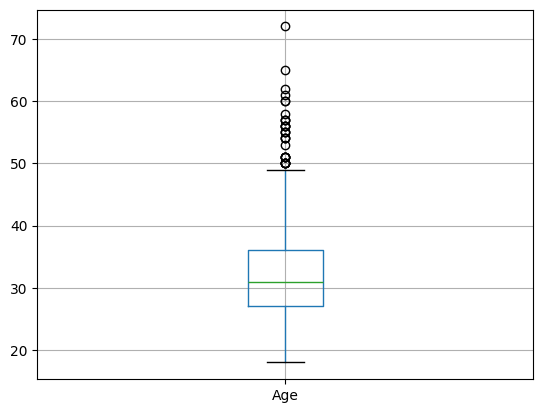

In [19]:
df.boxplot()

In [20]:
# i won't delete rows with age > 50

In [21]:
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,Female,United States,IL,,No,Yes,Often,6-25,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,M,United States,IN,,No,No,Rarely,More than 1000,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,Male,Canada,,,No,No,Rarely,6-25,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,,,Yes,Yes,Often,26-100,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,Male,United States,TX,,No,No,Never,100-500,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,,No,No,Yes,,26-100,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,,100-500,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [32]:
df['treatment'].unique()

array(['Yes', 'No'], dtype=object)

In [34]:
df['treatment'].replace({'Yes':1, 'No': 0}, inplace=True)

C:\Users\kyana\AppData\Local\Temp\ipykernel_19756\58297821.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['treatment'].replace({'Yes':1, 'No': 0}, inplace=True)


categoryze age and create pivot table

In [23]:
bin_labels_5 = ['Group1', 'Group2', 'Group3', 'Group4', 'Group5']

df['Age_group'] = pd.qcut(df['Age'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age_group
0,2014-08-27 11:29:31,37,Female,United States,IL,,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,Group4
1,2014-08-27 11:29:37,44,M,United States,IN,,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,Group5
2,2014-08-27 11:29:44,32,Male,Canada,,,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,Group3
3,2014-08-27 11:29:46,31,Male,United Kingdom,,,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,Group3
4,2014-08-27 11:30:22,31,Male,United States,TX,,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,Group3


In [24]:
def categorize_age(age):
    try:
        if 18 <= age <= 29:
            return '[18-29]'
        elif 30 <= age <= 49:
            return '[30-49]'
        elif age >=  50:
            return '[50+]'
    except:
        pass



In [26]:
df['Age_category2'] = df['Age'].apply(categorize_age)

In [37]:
data_temp1 = df.pivot_table(index='Age_category2', values='treatment', aggfunc=['count', 'sum', 'mean'])
data_temp1.columns = ['num_people', 'num_people_treated', 'prop_with_disease']
display(data_temp1.style.format("{:.3f}").background_gradient(cmap='Blues', axis=0))

,num_people,num_people_treated,prop_with_disease
Age_category2,,,
[18-29],517.000,242.000,0.468
[30-49],703.000,372.000,0.529
[50+],32.000,18.000,0.562


In [38]:
data_temp2 = df.pivot_table(index='Age_group', values='treatment', aggfunc=['count', 'sum', 'mean'])
data_temp2.columns = ['num_people', 'num_people_treated', 'prop_with_disease']
display(data_temp2.style.format("{:.3f}").background_gradient(cmap='Blues', axis=0))

C:\Users\kyana\AppData\Local\Temp\ipykernel_19756\1501395799.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  data_temp2 = df.pivot_table(index='Age_group', values='treatment', aggfunc=['count', 'sum', 'mean'])
C:\Users\kyana\AppData\Local\Temp\ipykernel_19756\1501395799.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  data_temp2 = df.pivot_table(index='Age_group', values='treatment', aggfunc=['count', 'sum', 'mean'])
C:\Users\kyana\AppData\Local\Temp\ipykernel_19756\1501395799.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning a

,num_people,num_people_treated,prop_with_disease
Age_group,,,
Group1,292.000,142.000,0.486
Group2,225.000,100.000,0.444
Group3,282.000,144.000,0.511
Group4,239.000,123.000,0.515
Group5,214.000,123.000,0.575
